**Aim**

The aim of this lab is for you to understand how the search strategies work.

**Preparation**

Read Chapter 6 of the Ertel book and Introduction to Uninformed Search available on the course website. You do not need to know all parts of Chapter 6 to complete the lab, but it is recommended.

**About the lab**

The lab consists of four parts. Each part give you a number of points. The lab can be done by at most two persons.

Demonstrate tasks 4.A and 4.B during the scheduled lab hours. Email the remaining tasks to
Elmira (elmira.zohrevandi@liu.se)


# Tree Search (10 points)

Consider the tree shown below. The numbers on the arcs are the arc lengths; the numbers near
the states B, C, and D are the heuristic estimates; all other states have a heuristic estimate of 0. A is the start state, and J is the goal state.

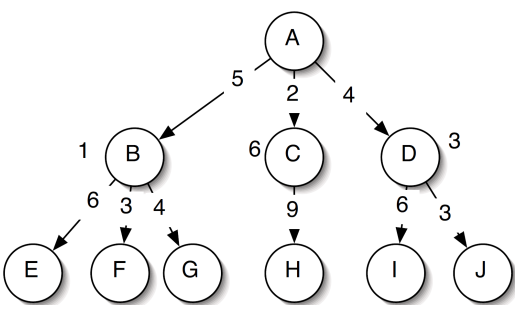

Write the sequence of states expanded by each search.




*   Bredth First - A, B, C, D, E, F, G, H, I, J
*   Depth First - A, B, E, F, G, C, H, D, I, J
*   Iterative Deepening Search - A, B, E, F, G, C, H, D, I, J (ta med noder när man börjar om?) Depth first, fast kan hantera ett "[Trémaux tree](https://en.wikipedia.org/wiki/Tr%C3%A9maux_tree)"
*   Best-First Search - A, B, E, F, G, D, I, J
*   A* Search -

A (6 - B, 7 - D, 8 - C)

A, B (3 - F, 4 - G, 6 - E, 7 - D, 8 - C )

A, B, F, G, H, (7 - D, 8 - C)

A, B, F, G, H, D (3 - J, 6 - I, 8 - C)

A, B, F, G, H, D, J




# Search Algorithms (15 points)

For each of the following situations, pick the search that is the most appropriate. Give a short explanation why you picked it.

A. We have a very large search space with a large branching factor and with possibly infinite paths. We have no heuristic. We want to find the path to the goal with minimum numbers of state (shortest path).

A. Answer: Uniform Cost Search, Finds optimal solution, no heuristic function.

B. We have a space with a manageable number of states but lots of cycles in the state graph. We have arcs of varying costs but no heuristic. We want to find the optimal path (the path with lowest cost).

B. Answer: Iterative Deepening Search

C. Our search space is a tree of fixed depth and all the goals are the leaves of the tree. We have a heuristic. We want to find any goal as quickly as possible.

C. Answer: A* eller Depth-first-search

D. We have a space with a manageable number of states but a lot of cycles in the state graph. We have arcs of varying costs and an admissible heuristic. We want to find the optimal path

D. Answer: IDA\*-Search or A\*

# 3 Search Problem Formulation (15 points)

Here is a well-known, medieval problem, also known as the water jugs problem.

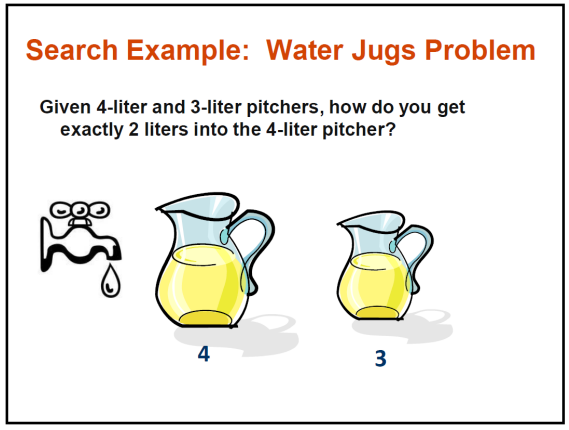

You have a 4 litre jug and a smaller jug that contains 3 litres. None of the jugs have markings on them, nor do you have any additional measuring device.

You have the following allowed operations:
*  Fill any of the jugs with water.
* Empty any of the jugs.
* Pour water from one jug into another till the other jug is completely full, or the first jug itself is empty.

Problem: How do you get exactly 2 liters of water into the 4 litre jug?

Solve the two tasks below:

A. Formulate this problem as a search problem by specifying the state space, initial state, path-cost function (you may assume a uniform cost for all allowed actions), and goal state. Try to be sure that the state space is detailed enough to support solving the problem, but not redundant.

A. Answer:
initial state (0,0)

create nodes (jug1, jug2)

jug1 max value is 4, jug2 max value is 3

create childnodes (fill a jug, empty a jug, move water)

uniform cost for all actions are assumed

goal state (2, x)

image as example

6 steps is optimal

B. Say what search technique would be most appropriate, and why

B. Answer: Breadth-first, Uniform Cost, Iterative Deepening. BFS and UCS should also work for this type of problem as long as there is some constant action cost or some type of history for steps to avoid cycles. All should have a similiar solution time since goal state is a sixth-level leaf.

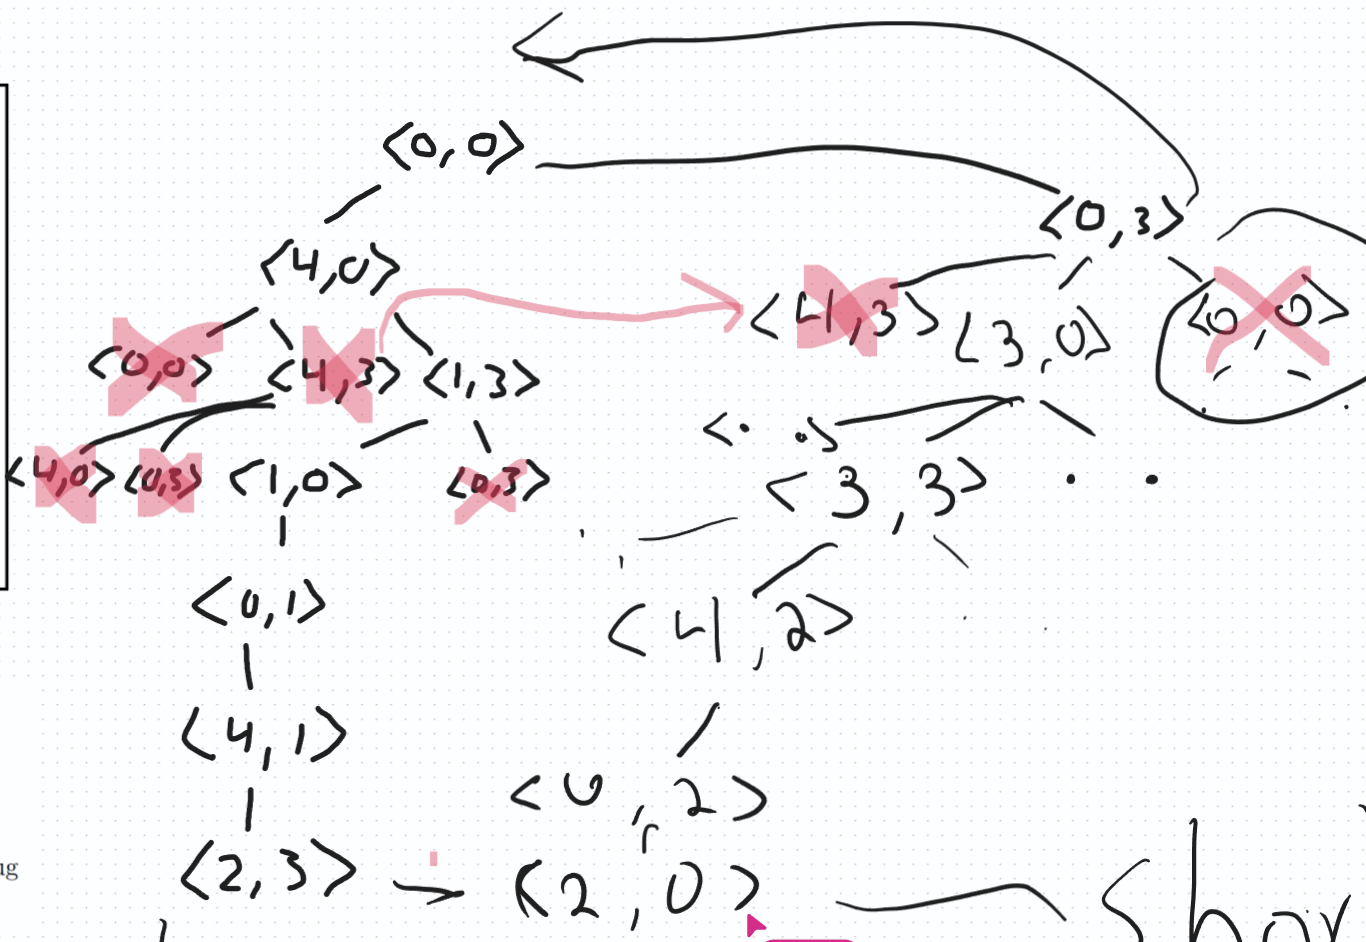

# - The 8-puzzle (60 points)

Consider the 8-puzzle problem defined in Example 6.1 on page 84 of Ertel book. For the 8-
puzzle there are two simple heuristics h1 and h2 defined in Sect. 6.3.4 on page 100 of Ertel
book.
* h1 = the number of misplaced tiles; the number of squares that are not in the right place.
The space is not a tile, so it cannot be out of place.
* h2 = the Manhattan distance

A. (40 points)
Implement the A*-search algorithm for the 8-puzzle that uses the heuristic h1. Explain the data structure that you used when you present your solution to the lab assistant. It is important that you choose a good data structure for an efficient solution. Your program has to find a solution within 60 seconds.

B. (10 points)
Extend your program by implementing the heuristic h2.

C. (10 points)
Consider again the two heuristics h1 and h2. Answer the following questions. Explain
your answer.
1. Are h1 and h2 admissible?
2. Which heuristic among h1 and h2 performs better, and why?
3. Which of the following heuristics are admissible?
- h3 = (h1+h2)/2
- h4 = 2 × h1
- h5 = max(h1,h2)#

-------------------------------
- C answers - preliminary
 1. Yes, both are admissible, although h2 is far superior.
 2. h2 preforms better, mainly due to skipping paths that don't lead towards the goal
 3. idfk



Some stats (layout tested: [[6, 5, 8], [7, 1, 3], [4, 2, 0]]):
- Lists
  - h1 clears in ~115s on collab and ~70s on PC
  - h2 clears in ~37s on collab and ~97s on PC
- Priority queues
  - h1 clears in ~27s on collab and ~5s on PC
  - h2 clears in ~47s on collab and ~.5s on PC

In [64]:
!python --version

Python 3.11.12


In [65]:
import numpy as np
import bisect
import time
from queue import PriorityQueue

start = time.time()

In [66]:
bisect.insort

<function _bisect.insort_right(a, x, lo=0, hi=None, *, key=None)>

## Generate solvable board

In [67]:
def checkBoardSolvable(layout):
  # https://gamedev.stackexchange.com/questions/40307/why-is-this-8-puzzle-unsolvable
  #layoutVec = np.squeeze(np.asarray(layout))
  numberOfInversions = 0
  layoutVec = np.asarray(layout).reshape(-1)
  for i in range(0,8):
    value1 = layoutVec[i]
    if(value1 != 0):
      for j in range(i,8):
        value2 = layoutVec[j]
        if(value2 != 0):
          if(value1 > value2):
            numberOfInversions += 1
  # even solvable
  if(numberOfInversions % 2 == 0):
    return True

  return False

In [68]:
from random import randrange
def generateRandomBoard():
  board = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
  for i in range(9):
    x = randrange(3)
    y = randrange(3)
    while(board[y][x] != 0):
      x = randrange(3)
      y = randrange(3)

    board[y][x] = i
  return board

In [69]:
def generateValidBoard():
  layout = generateRandomBoard()
  while(not checkBoardSolvable(layout)):
    layout = generateRandomBoard()

  return layout

## Handle Board

In [70]:
'''
def generateH(layout, goal):
    h = 0

    # h2 - manhattan distance
    for x1 in range(3):
          for y1 in range(3):
            for x2 in range(3):
              for y2 in range(3):
                if(layout[y1][x1] == goal[y2][x2]):
                  h += abs(x1-x2) + abs(y1-y2)

    return h
'''
def generateH(layout, goal): # h1 - Missing tiles
    h = 0
    for x in range(3):
      for y in range(3):
        if(layout[y][x] != goal[y][x]):
          h += 1
    return h


In [71]:
import copy
def legalMoves(layout):
  possibleLayouts = []
  x0 = -1
  y0 = -1
  '''
  ex
  -- 0 1 2 --> x
  0  7 1 4
  1  3 0 8
  2  2 6 5
  |
  v
  y
  '''

  for x in range(3):
    for y in range(3):
      if(layout[y][x] == 0):
        x0 = x
        y0 = y

  # check move left (move -x)
  if(x0 > 0):
    tempLayout = [row[:] for row in layout]
    swapValue = tempLayout[y0][x0-1]
    tempLayout[y0][x0-1] = 0
    tempLayout[y0][x0] = swapValue
    possibleLayouts.append(tempLayout)

  # check move right (move +x)
  if(x0 < 2):
    tempLayout = [row[:] for row in layout]
    swapValue = tempLayout[y0][x0+1]
    tempLayout[y0][x0+1] = 0
    tempLayout[y0][x0] = swapValue
    possibleLayouts.append(tempLayout)

  # check move up (move -y)
  if(y0 > 0):
    tempLayout = [row[:] for row in layout]
    swapValue = tempLayout[y0-1][x0]
    tempLayout[y0-1][x0] = 0
    tempLayout[y0][x0] = swapValue
    possibleLayouts.append(tempLayout)

  # check move down (move +y)
  if(y0 < 2):
    tempLayout = [row[:] for row in layout]
    swapValue = tempLayout[y0+1][x0]
    tempLayout[y0+1][x0] = 0
    tempLayout[y0][x0] = swapValue
    possibleLayouts.append(tempLayout)
  return possibleLayouts

In [72]:
class puzzleBoard:
  layout = []
  goal = []
  parentNodes = ""
  depth = 0
  h = 0
  f = 0

  def __init__(self, startLayout, goal, depth, parent):
    self.layout = startLayout
    self.goal = goal
    self.depth = depth
    self.h = generateH(self.layout, self.goal)
    self.f = self.depth + self.h
    self.parentNodes = str(parent) + "\n" +  str(self.layout)

  def getLayout(self):
    return self.layout

  def getGoal(self):
    return self.goal

  def getDepth(self):
    return self.depth

  def geth(self):
    return self.h

  def getf(self):
    return self.f

  def __lt__ (self, other):
      return self.f < other.f

  def getParents(self):
    return self.parentNodes

  def genChildren(self, closedList):
    possibleLayouts = legalMoves(copy.deepcopy(self.layout))
    children = []
    for layout in possibleLayouts:
      newLayout = True

      if tuple(map(tuple, layout)) in closedList:
        newLayout = False

      if newLayout:
        tempChild = puzzleBoard(layout, self.goal, self.depth + 1, self.parentNodes)
        children.append(copy.deepcopy(tempChild))
    return children

## Main

In [73]:
#startLayout = generateValidBoard()
#startLayout = [[1, 2, 3], [4, 0, 6], [7, 8, 5]]
startLayout = [[8, 6, 7], [2, 5, 4], [3, 0, 1]]
goalLayout = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
'''
---------> x
| 1 2 3
| 4 5 6
| 7 8 0
v
y
''',
a = puzzleBoard(startLayout, goalLayout, 0, [])
a.h
a.getLayout()
a.getGoal()

[[1, 2, 3], [4, 5, 6], [7, 8, 0]]

In [74]:
a.getLayout()

[[8, 6, 7], [2, 5, 4], [3, 0, 1]]

In [75]:
checkBoardSolvable(a.getLayout())

False

In [76]:
b = legalMoves(a.getLayout())

In [77]:
print(a.getParents())

[]
[[8, 6, 7], [2, 5, 4], [3, 0, 1]]


In [78]:
d = a.genChildren([])
for i in d:
  print(i.geth())

8
7
9


## A*

In [79]:
#startLayout = generateValidBoard()
#startLayout = [[1, 3, 2], [4, 6, 5], [7, 0, 8]]
#startLayout = [[6, 5, 8], [7, 1, 3], [4, 2, 0]] # Hard-board
startLayout = [[8,6,7],[2,5,4],[3,0,1]] #hardest board

goalLayout = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
currentPuzzle = puzzleBoard(startLayout, goalLayout, 0, "")
closedList = set()
openedList = PriorityQueue()  # openedList = [currentPuzzle]
openedList.put(currentPuzzle)
# goal reached when h == 0
print(currentPuzzle.getLayout())

[[8, 6, 7], [2, 5, 4], [3, 0, 1]]


In [80]:
while(currentPuzzle.geth() != 0):
  currentPuzzle = openedList.get()

  closedList.add(tuple(map(tuple, currentPuzzle.getLayout())))
  children = currentPuzzle.genChildren(closedList)

  for childPuzzle in children:
    openedList.put(childPuzzle)

In [81]:
currentPuzzle.getLayout()

[[1, 2, 3], [4, 5, 6], [7, 8, 0]]

In [82]:
end = time.time()
print(end - start)

12.064806699752808


In [87]:
print(currentPuzzle.getParents())


[[8, 6, 7], [2, 5, 4], [3, 0, 1]]
[[8, 6, 7], [2, 5, 4], [3, 1, 0]]
[[8, 6, 7], [2, 5, 0], [3, 1, 4]]
[[8, 6, 7], [2, 0, 5], [3, 1, 4]]
[[8, 6, 7], [0, 2, 5], [3, 1, 4]]
[[8, 6, 7], [3, 2, 5], [0, 1, 4]]
[[8, 6, 7], [3, 2, 5], [1, 0, 4]]
[[8, 6, 7], [3, 2, 5], [1, 4, 0]]
[[8, 6, 7], [3, 2, 0], [1, 4, 5]]
[[8, 6, 0], [3, 2, 7], [1, 4, 5]]
[[8, 0, 6], [3, 2, 7], [1, 4, 5]]
[[0, 8, 6], [3, 2, 7], [1, 4, 5]]
[[3, 8, 6], [0, 2, 7], [1, 4, 5]]
[[3, 8, 6], [2, 0, 7], [1, 4, 5]]
[[3, 0, 6], [2, 8, 7], [1, 4, 5]]
[[0, 3, 6], [2, 8, 7], [1, 4, 5]]
[[2, 3, 6], [0, 8, 7], [1, 4, 5]]
[[2, 3, 6], [1, 8, 7], [0, 4, 5]]
[[2, 3, 6], [1, 8, 7], [4, 0, 5]]
[[2, 3, 6], [1, 8, 7], [4, 5, 0]]
[[2, 3, 6], [1, 8, 0], [4, 5, 7]]
[[2, 3, 6], [1, 0, 8], [4, 5, 7]]
[[2, 3, 6], [1, 5, 8], [4, 0, 7]]
[[2, 3, 6], [1, 5, 8], [4, 7, 0]]
[[2, 3, 6], [1, 5, 0], [4, 7, 8]]
[[2, 3, 0], [1, 5, 6], [4, 7, 8]]
[[2, 0, 3], [1, 5, 6], [4, 7, 8]]
[[0, 2, 3], [1, 5, 6], [4, 7, 8]]
[[1, 2, 3], [0, 5, 6], [4, 7, 8]]
[[1, 2, 3], [